In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

Assuming distributions for Availability parameters (MTBF, MTTR, MLDT)



 \\( A = \frac{MTBF}{MTBF+MTTR+MLDT} \\) 

MTBF: Drawing samples from exponential distribution

10000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of MTBF (with assumed exponential distribution)')

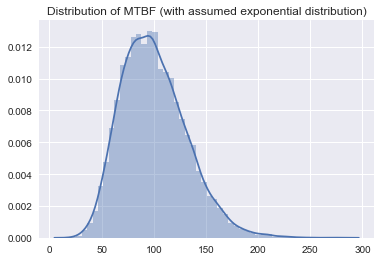

In [2]:
failData = np.array([]) 
MTBF_samples = np.array([])
# draw one sample from exp dist
drawSampleExp = lambda beta: np.random.exponential(scale=beta)

for i in range(10000): 
    #draw 10 samples
    for i in range(10):    
         failData = np.append(failData, drawSampleExp(100))
    MTBF = np.mean(failData)
    MTBF_samples = np.append(MTBF_samples, MTBF)
    failData = np.array([])
    
print(len(MTBF_samples))

df = pd.DataFrame()
df['MTBF_samples'] = MTBF_samples
df.to_csv("MTBF_for_samples_exp.csv")
sns.distplot(MTBF_samples)
plt.title("Distribution of MTBF (with assumed exponential distribution)")

MTBF assuming gamma distribution with set parameters (scale = 9.98, shape= 10.03)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of MTBF (pulled from Gamma distribution)')

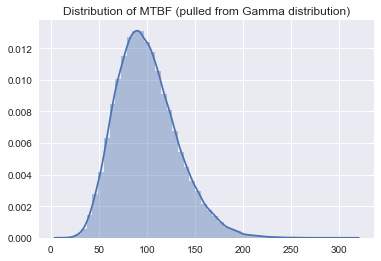

In [3]:
failData1 = np.array([]) 
MTBF1_samples = np.array([])
drawSampleGamma = lambda scale, shape: np.random.gamma(scale=scale, shape=shape)

for i in range(100000): 
    #draw 10 samples from Gamma
    #failData1 = np.append(failData1, drawSampleGamma(9.98, 10.03))
    MTBF1 = np.mean(drawSampleGamma(9.98, 10.03))
    MTBF1_samples = np.append(MTBF1_samples, MTBF1)
    failData1 = np.array([])

df1 = pd.DataFrame()
df1['MTBF1_samples'] = MTBF1_samples
df1.to_csv("MTBF_for_samples_gamma.csv")
sns.distplot(MTBF1_samples)
plt.title("Distribution of MTBF (pulled from Gamma distribution)")

MTTR with a random sample of 20 repair times. Use mean and sigma to sample from lognormal distribution

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of MTTR (assuming lognormal distribution)')

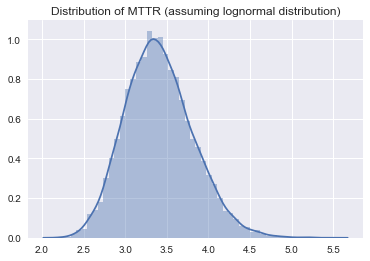

In [4]:
repairData = np.array([]) 
MTTR_samples = np.array([])
#draw one sample from lognormal distribution
drawSampleLn = lambda mean, sigma: np.random.lognormal(mean=mean, sigma=sigma)
#mean = np.mean(repairData)
#sigma = np.var(repairData)
mean = 1.1
sigma = .5

for i in range(10000): 
    #draw 10 samples
    for i in range(20):
        repairData = np.append(repairData, drawSampleLn(mean, sigma))
    MTTR = np.mean(repairData)
    MTTR_samples = np.append(MTTR_samples, MTTR)
    repairData = np.array([])
    
df2 = pd.DataFrame()
df2['MTTR_samples'] = MTTR_samples
df2.to_csv("MTTR_for_samples_lognormal.csv")
sns.distplot(MTTR_samples)
plt.title("Distribution of MTTR (assuming lognormal distribution)")

MLDT  --  given one value, estimate the variability in MLDT (dbar) as follows:  
delay time $dt \sim Lognormal(\bar{d}, 0.5\times dbar)$  
Draw n=5 samples from dt distribution.  
Calculate the mean $\bar{d*}$  
Draw R = 1000 replicates.  
Make histrogram of $\bar{d*}$'s and randomly sample one MLDT value to use in the calclulation from this distribution.  
Because there are no sample points, we are assuming that SE for MLDT distribution is $SE = \dot{bar}, where c = \frac{(1/2)}{/sqrt(5)}  $

In [123]:
drawDTSample = lambda MLDT, size: np.random.lognormal(MLDT, 0.5*MLDT, size)

def drawDBAR(MLDT):
    arr = np.array([])
    arr = drawDTSample(MLDT, 5)
    return np.mean(arr)

def createMLDTDistribution(MLDT):
    arr = np.array([])
    for i in range(100000): 
        dbar = drawDBAR(MLDT)
        arr = np.append(arr, dbar)
    return(arr)

In [124]:
MLDT = 1
mldt_dist = createMLDTDistribution(MLDT)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of MLDT (assuming lognormal distribution)')

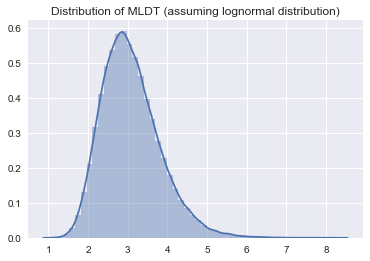

In [125]:
#df3 = pd.DataFrame()
#df3['MLDT_dist'] = mldt_dist
#df3.to_csv("MLDT_distribution.csv")
sns.distplot(mldt_dist)
plt.title("Distribution of MLDT (assuming lognormal distribution)")

In [144]:
rMLDT = np.random.choice(mldt_dist, 1)